In [1]:
import pandas as pd

# ===============================
# 1. Load dữ liệu CSV
# ===============================
# Thay 'data.csv' bằng file của bạn
df = pd.read_csv("/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/1/rev_stops_by_var.csv")

# ===============================
# 2. Kiểm tra thông tin cơ bản
# ===============================
print("=== Thông tin cơ bản ===")
print("Số dòng và cột:", df.shape)
print("Tên các cột:", df.columns.tolist())
print("\n5 dòng đầu tiên:\n", df.head())

# ===============================
# 3. Kiểm tra giá trị null
# ===============================
print("\n=== Số lượng giá trị null ===")
print(df.isnull().sum())

# ===============================
# 4. Thống kê mô tả cho cột số
# ===============================
print("\n=== Thống kê mô tả ===")
print(df.describe())

# ===============================
# 5. Thống kê giá trị duy nhất
# ===============================
print("\n=== Giá trị duy nhất trong từng cột ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} giá trị duy nhất")


=== Thông tin cơ bản ===
Số dòng và cột: (33, 14)
Tên các cột: ['StopId', 'Code', 'Name', 'StopType', 'Zone', 'Ward', 'AddressNo', 'Street', 'SupportDisability', 'Status', 'Lng', 'Lat', 'Search', 'Routes']

5 dòng đầu tiên:
    StopId    Code                 Name  StopType    Zone Ward  \
0       8    BX14  Bến xe buýt Chợ Lớn    Bến xe  Quận 5  NaN   
1    2393  Q6 096            Tháp Mười  Trụ dừng  Quận 6  NaN   
2       2  Q5 016         Chợ Kim Biên  Trụ dừng  Quận 5  NaN   
3       3  Q5 011      Bưu điện Quận 5     Ô sơn  Quận 5  NaN   
4       5  Q5 012        Rạp Đại Quang   Nhà chờ  Quận 5  NaN   

         AddressNo              Street SupportDisability          Status  \
0  GA HKXB CHO LON       Lê Quang Sung               NaN  Đang khai thác   
1          13C-13D           Tháp Mười               NaN  Đang khai thác   
2            11-12  Hải Thượng Lãn Ông               NaN  Đang khai thác   
3            14-16       Châu Văn Liêm               NaN  Đang khai thác   
4   

In [9]:
# Thư mục gốc
root_dir = '/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/'

# Danh sách tất cả tuyến xe buýt
routes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Tạo list để chứa dataframe từng tuyến
all_stops = []

for route in routes:
    route_dir = os.path.join(root_dir, route)
    files_to_read = ['stops_by_var.csv', 'rev_stops_by_var.csv']

    for f in files_to_read:
        file_path = os.path.join(route_dir, f)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            # Chỉ giữ cột cần thiết
            df = df[['StopId','Zone','StopType']]
            all_stops.append(df)

# Gộp tất cả tuyến
stops_df = pd.concat(all_stops, ignore_index=True)

# Loại bỏ StopId trùng lặp trong cùng 1 Zone
stops_df_unique = stops_df.drop_duplicates(subset=['StopId','Zone'])


In [10]:
# Tổng số stop mỗi quận
stop_count = stops_df_unique.groupby('Zone')['StopId'].count().reset_index()
stop_count.rename(columns={'StopId':'TotalStops'}, inplace=True)

# Số Nhà chờ mỗi quận
shelter_count = stops_df_unique[stops_df_unique['StopType']=='Nhà chờ'].groupby('Zone')['StopId'].count().reset_index()
shelter_count.rename(columns={'StopId':'Shelters'}, inplace=True)

# Merge 2 bảng
zone_stats = pd.merge(stop_count, shelter_count, on='Zone', how='left')
zone_stats['Shelters'] = zone_stats['Shelters'].fillna(0).astype(int)

# % Nhà chờ
zone_stats['ShelterPct'] = (zone_stats['Shelters'] / zone_stats['TotalStops'] * 100).round(2)

zone_stats


,Zone,TotalStops,Shelters,ShelterPct
0,Huyện Bình Chánh,325,6,1.85
1,Huyện Củ Chi,37,8,21.62
2,Huyện Hóc Môn,44,9,20.45
3,Huyện Nhà Bè,84,6,7.14
4,Quận 1,107,67,62.62
5,Quận 10,38,13,34.21
6,Quận 11,43,12,27.91
7,Quận 12,99,16,16.16
8,Quận 3,47,15,31.91
9,Quận 4,35,7,20.00


/tmp/ipython-input-1082429175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


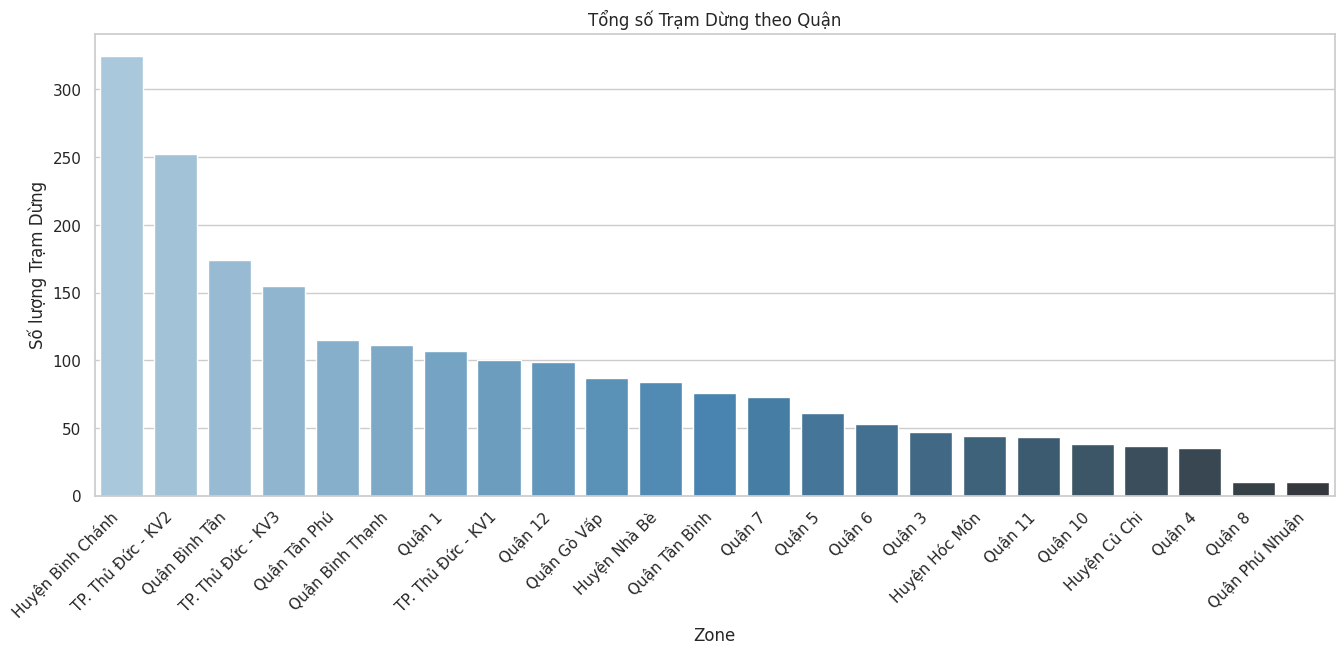

/tmp/ipython-input-1082429175.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


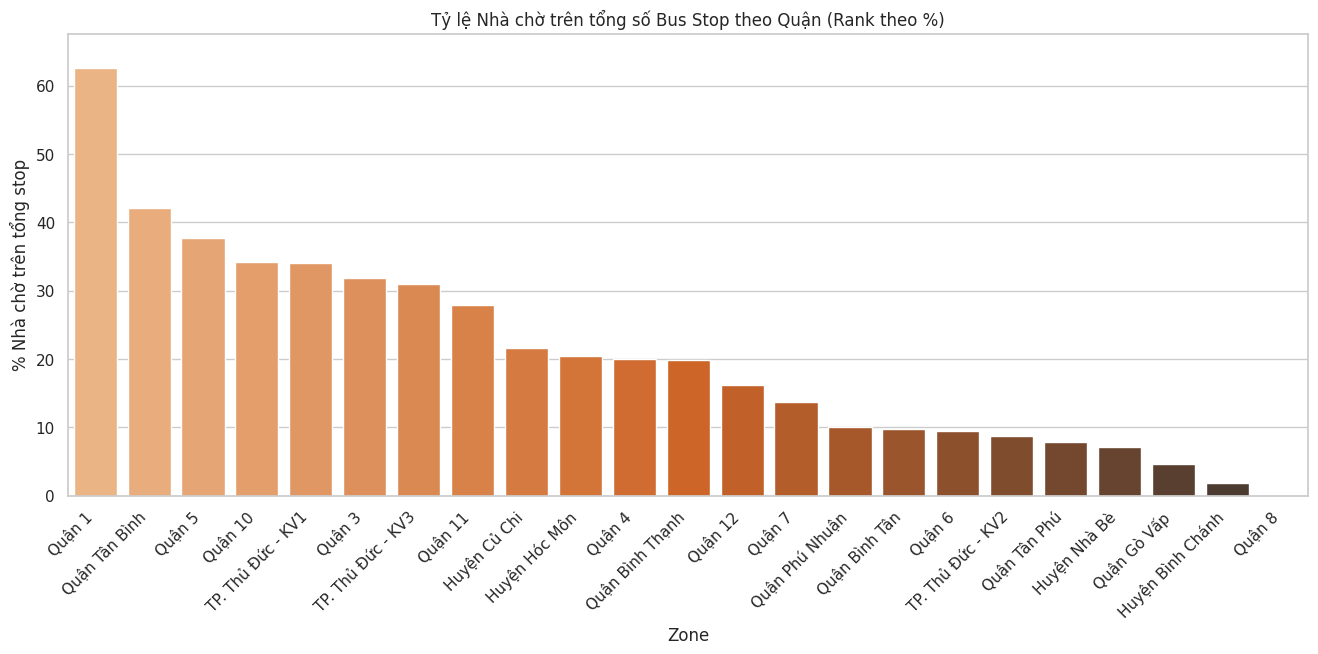

In [15]:
# Bar plot tổng số stop
plt.figure(figsize=(16,6))
ax = sns.barplot(
    data=zone_stats.sort_values('TotalStops', ascending=False),
    x='Zone',
    y='TotalStops',
    palette='Blues_d'
)
plt.title("Tổng số Trạm Dừng theo Quận")

# Dịch chữ trục X sang trái 1 ít và giữ rotate 45 độ
for tick in ax.get_xticklabels():
    tick.set_rotation(45)                  # nghiêng 45 độ
    tick.set_horizontalalignment('right')  # canh phải so với vị trí mới
    tick.set_x(tick.get_position()[0] - 0.035)  # dịch sang trái 0.05 (tùy chỉnh)

plt.ylabel("Số lượng Trạm Dừng")
plt.show()

plt.figure(figsize=(16,6))

# Sắp xếp theo % Nhà chờ giảm dần
zone_stats_sorted = zone_stats.sort_values('ShelterPct', ascending=False)

# Vẽ bar plot
ax = sns.barplot(
    data=zone_stats_sorted,
    x='Zone',
    y='ShelterPct',
    palette='Oranges_d'
)

plt.title("Tỷ lệ Nhà chờ trên tổng số Bus Stop theo Quận (Rank theo %)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("% Nhà chờ trên tổng stop")
plt.ylim(0, zone_stats['ShelterPct'].max() + 5)  # thêm khoảng trống trên cột
plt.show()

In [24]:
import requests
import pandas as pd
from datetime import date, timedelta

# Ví dụ danh sách một vài quận + lat/lon đại diện (bạn cần bổ sung đầy đủ)
districts = {
    "Quận 1": (10.675985, 106.759847	),
    "Quận 2": (10.705547, 106.737381),
    "Quận 3": (10.725028	, 106.734554),
    # … bổ sung các quận/huyện còn lại
}

# Hàm lấy nhiệt độ từ API Open‑Meteo
def get_avg_noon_temp(lat, lon, date_str):
    url = (
        "https://archive-api.open-meteo.com/v1/era5?"
        f"latitude={lat}&longitude={lon}"
        f"&start_date={date_str}&end_date={date_str}"
        "&hourly=temperature_2m"
        "&timezone=Asia/Ho_Chi_Minh"
    )
    resp = requests.get(url)
    data = resp.json()
    times = data["hourly"]["time"]
    temps = data["hourly"]["temperature_2m"]
    df = pd.DataFrame({"time": times, "temp": temps})
    # Chuyển sang datetime
    df["time"] = pd.to_datetime(df["time"])
    # Lọc giờ buổi trưa, ví dụ từ 12:00 đến 14:00
    df_noon = df[(df["time"].dt.hour >= 20) & (df["time"].dt.hour <= 23)]
    print(df_noon)
    return df_noon["temp"].mean()

# Ví dụ lấy nhiệt độ hôm nay cho các quận mẫu
today = date.today().isoformat()
results = []
for district, (lat, lon) in districts.items():
    avg_temp = get_avg_noon_temp(lat, lon, today)
    results.append({"District": district, "AvgNoonTemp": avg_temp})

df_results = pd.DataFrame(results)
print(df_results)


                  time  temp
20 2025-11-22 20:00:00  25.2
21 2025-11-22 21:00:00  25.1
22 2025-11-22 22:00:00  24.9
23 2025-11-22 23:00:00  24.6
                  time  temp
20 2025-11-22 20:00:00  25.1
21 2025-11-22 21:00:00  25.0
22 2025-11-22 22:00:00  24.9
23 2025-11-22 23:00:00  24.7
                  time  temp
20 2025-11-22 20:00:00  25.2
21 2025-11-22 21:00:00  24.9
22 2025-11-22 22:00:00  24.9
23 2025-11-22 23:00:00  24.6
  District  AvgNoonTemp
0   Quận 1       24.950
1   Quận 2       24.925
2   Quận 3       24.900


In [25]:
import requests
import pandas as pd
import time
from datetime import datetime, timedelta

# Thông tin các quận + lat/lon đại diện
districts = {
    "Quận 1": (10.7758, 106.7009),
    "Quận 3": (10.7798, 106.6803),
    # … thêm các quận còn lại
}

API_KEY = "9ed3e3bd029814cc4f5ea4ed18a40213"

def get_avg_noon_temp_owm(lat, lon, start_unix, end_unix):
    url = (
        "https://history.openweathermap.org/data/2.5/history/city"
        f"?lat={lat}&lon={lon}"
        f"&type=hour&start={start_unix}&end={end_unix}"
        f"&units=metric&appid={API_KEY}"
    )
    response = requests.get(url)
    data = response.json()
    temps = [item["main"]["temp"] for item in data.get("list", [])]
    times = [item["dt"] for item in data.get("list", [])]
    df = pd.DataFrame({"dt": times, "temp": temps})
    df["dt"] = pd.to_datetime(df["dt"], unit="s")
    # Lọc khung giờ 12-14
    df_noon = df[(df["dt"].dt.hour >= 12) & (df["dt"].dt.hour < 15)]
    if len(df_noon) == 0:
        return None
    return df_noon["temp"].mean()

# Ví dụ: lấy dữ liệu hôm qua
yesterday = datetime.utcnow().date() - timedelta(days=1)
start_ts = int(datetime(yesterday.year, yesterday.month, yesterday.day, 0, 0).timestamp())
end_ts = int(datetime(yesterday.year, yesterday.month, yesterday.day, 23, 59).timestamp())

results = []
for district, (lat, lon) in districts.items():
    avg_temp = get_avg_noon_temp_owm(lat, lon, start_ts, end_ts)
    results.append({"District": district, "AvgNoonTemp": avg_temp})
    time.sleep(1)  # tránh request quá nhanh

df_results = pd.DataFrame(results)
print(df_results)


/tmp/ipython-input-3453102583.py:35: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  yesterday = datetime.utcnow().date() - timedelta(days=1)


  District AvgNoonTemp
0   Quận 1        None
1   Quận 3        None


/tmp/ipython-input-429974753.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_df_unique['StopClass'] = stops_df_unique['StopType'].apply(


StopClass
Ô sơn         252
Bến xe         36
Nhà chờ       386
Khác            3
Trụ dừng     1426
Biển treo      33
Name: count, dtype: int64


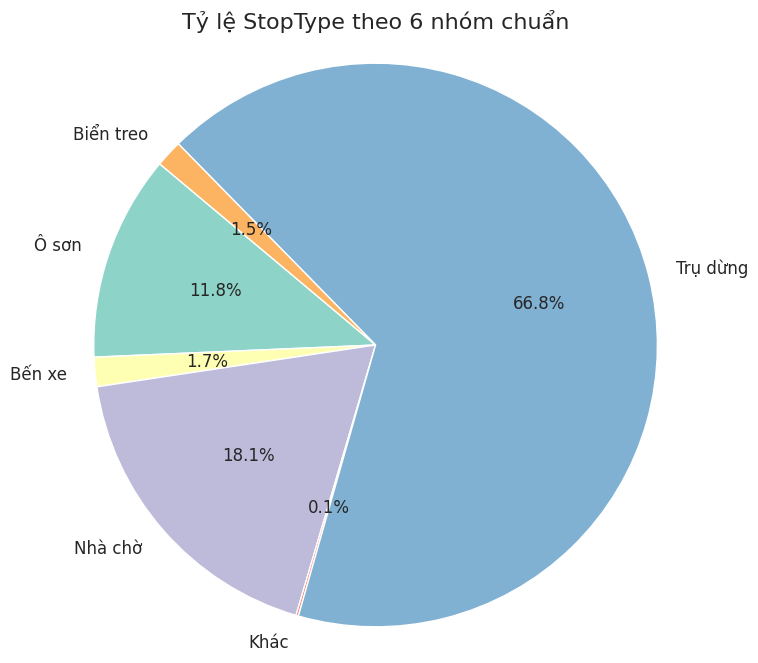

In [31]:
import matplotlib.pyplot as plt

# ----------------------------------
# Tạo mapping StopType → 6 nhóm chuẩn
# ----------------------------------
mapping = {
    'Biển treo': 'Biển treo',
    'Ô sơn': 'Ô sơn',
    'Bến xe': 'Bến xe',
    'Nhà chờ': 'Nhà chờ',
    'Trụ dừng': 'Trụ dừng'

}

#-------------------------
# Thêm cột "StopClass"
#-------------------------
stops_df_unique['StopClass'] = stops_df_unique['StopType'].apply(
    lambda x: mapping[x] if x in mapping else 'Khác'
)

#-------------------------
# Đếm số lượng theo class
#-------------------------
class_counts = stops_df_unique['StopClass'].value_counts().reindex(
    ['Ô sơn','Bến xe','Nhà chờ','Khác','Trụ dừng','Biển treo'],
    fill_value=0
)

print(class_counts)

#-------------------------
# Vẽ Pie Chart
#-------------------------
plt.figure(figsize=(8,8))
colors = plt.cm.Set3(range(len(class_counts)))  # Màu pastel đẹp

plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize':12}
)

plt.title("Tỷ lệ StopType theo 6 nhóm chuẩn", fontsize=16)
plt.axis('equal')

plt.show()


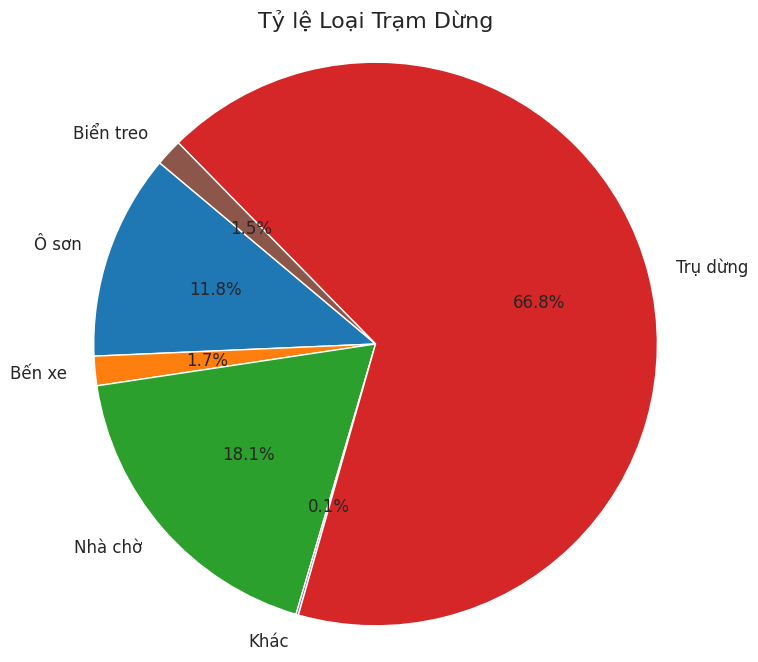

In [43]:
import matplotlib.pyplot as plt

# -------------------------
# 7 màu chủ đạo (có thể đổi theo ý bạn)
colors = [
    "#1f77b4",  # xanh dương
    "#ff7f0e",  # cam
    "#2ca02c",  # xanh lá
    "#9467bd",  # đỏ
    "#d62728",  # tím
    "#8c564b",  # nâu
    "#e377c2"   # hồng
]

plt.figure(figsize=(8,8))

plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors[:len(class_counts)],  # dùng đúng số class
    textprops={'fontsize':12}
)

plt.title("Tỷ lệ Loại Trạm Dừng", fontsize=16)
plt.axis('equal')
plt.show()


START GROUP COUNTS:
StartGroup
3–4     2
4–5    15
5–6    13
Name: count, dtype: int64

END GROUP COUNTS:
EndGroup
18–19     1
19–20    14
20–21     7
21–22     3
22–23     5
Name: count, dtype: int64


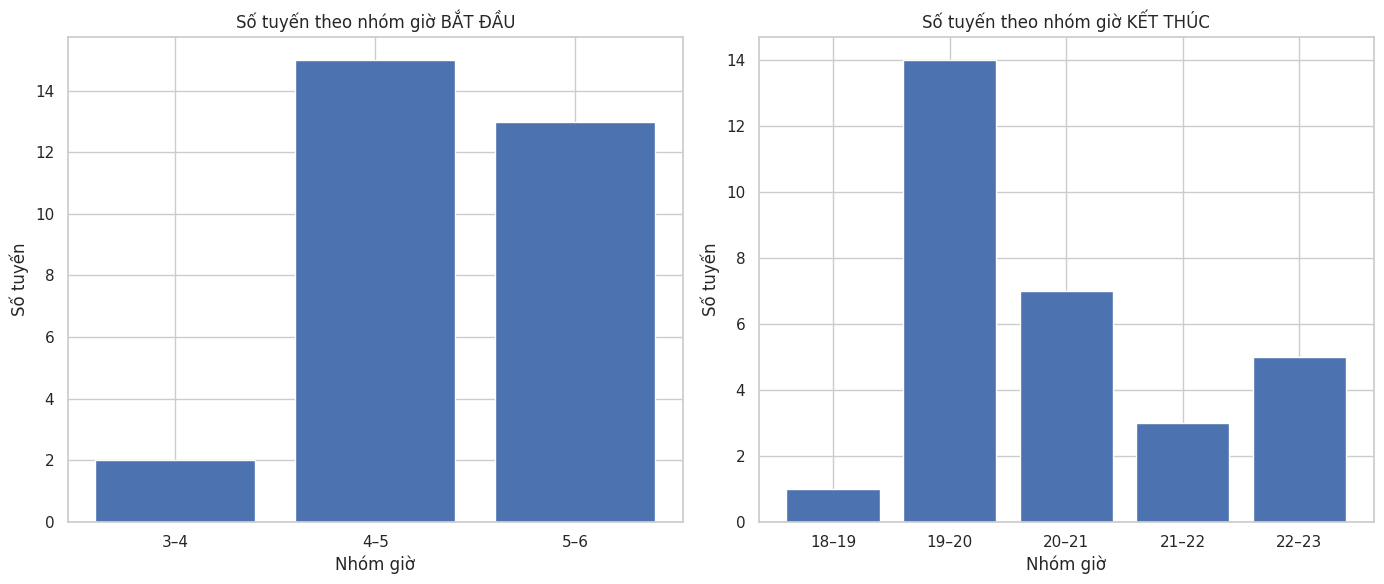

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

root_dir = '/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/'


routes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

all_times = []

def parse_time(t):
    parts = t.split(':')
    hour = int(parts[0])
    minute = int(parts[1]) if len(parts) > 1 else 0
    return hour + minute/60


for route in routes:
    file_path = os.path.join(root_dir, route, 'route_by_id.csv')

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        if 'OperationTime' in df.columns:
            opt = df['OperationTime'].iloc[0]  # format "4:30 - 21:00"

            try:
                start, end = opt.split('-')
                start = start.strip()
                end = end.strip()

                start_hour = parse_time(start)
                end_hour = parse_time(end)

                all_times.append([route, start_hour, end_hour])

            except:
                print("OperationTime lỗi ở tuyến:", route)
                continue


times_df = pd.DataFrame(all_times, columns=['Route', 'StartHour', 'EndHour'])


# -------------------------------
# GOM NHÓM GIỜ BẮT ĐẦU
# -------------------------------
start_bins = [3, 4, 5, 6]
start_labels = ["3–4", "4–5", "5–6"]

times_df["StartGroup"] = pd.cut(
    times_df['StartHour'],
    bins=start_bins,
    labels=start_labels,
    right=False
)

start_group_counts = times_df["StartGroup"].value_counts().sort_index()
print("START GROUP COUNTS:")
print(start_group_counts)


# -------------------------------
# GOM NHÓM GIỜ KẾT THÚC
# -------------------------------
end_bins = [18, 19, 20, 21, 22, 23]
end_labels = ["18–19", "19–20", "20–21", "21–22", "22–23"]

times_df["EndGroup"] = pd.cut(
    times_df['EndHour'],
    bins=end_bins,
    labels=end_labels,
    right=False
)

end_group_counts = times_df["EndGroup"].value_counts().sort_index()
print("\nEND GROUP COUNTS:")
print(end_group_counts)


# -------------------------------
# PLOT BIỂU ĐỒ
# -------------------------------
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.bar(start_group_counts.index, start_group_counts.values)
plt.title("Số tuyến theo nhóm giờ BẮT ĐẦU")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")

plt.subplot(1,2,2)
plt.bar(end_group_counts.index, end_group_counts.values)
plt.title("Số tuyến theo nhóm giờ KẾT THÚC")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")

plt.tight_layout()
plt.show()


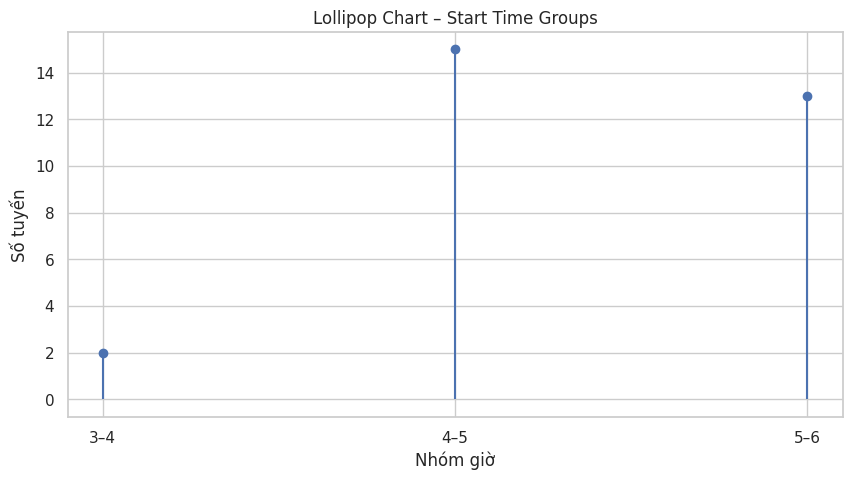

In [34]:
plt.figure(figsize=(10,5))
plt.stem(start_group_counts.index, start_group_counts.values, basefmt=" ")
plt.title("Lollipop Chart – Start Time Groups")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")
plt.show()


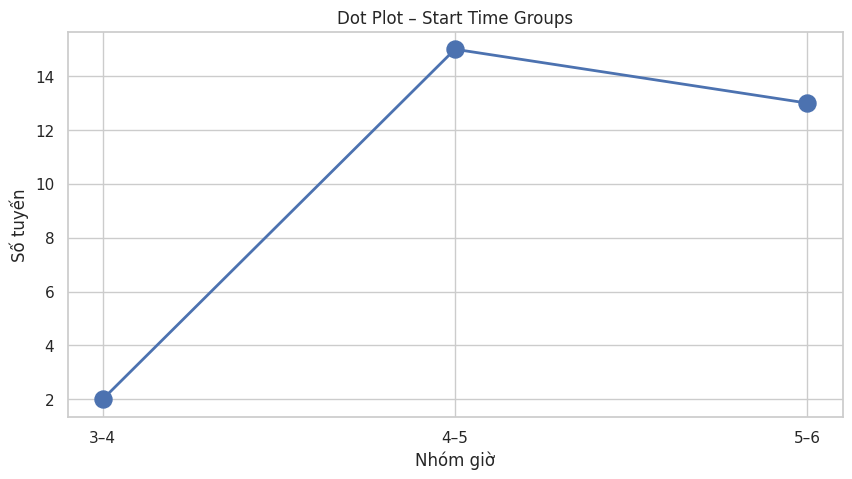

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(start_group_counts.index, start_group_counts.values, s=150)
plt.plot(start_group_counts.index, start_group_counts.values, linewidth=2)
plt.title("Dot Plot – Start Time Groups")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")
plt.show()


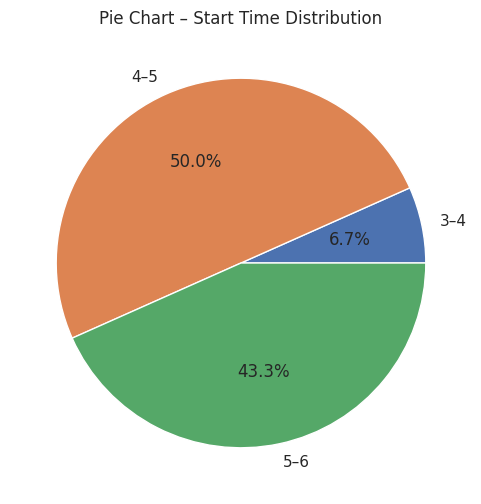

In [36]:
plt.figure(figsize=(6,6))
plt.pie(start_group_counts, labels=start_group_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart – Start Time Distribution")
plt.show()


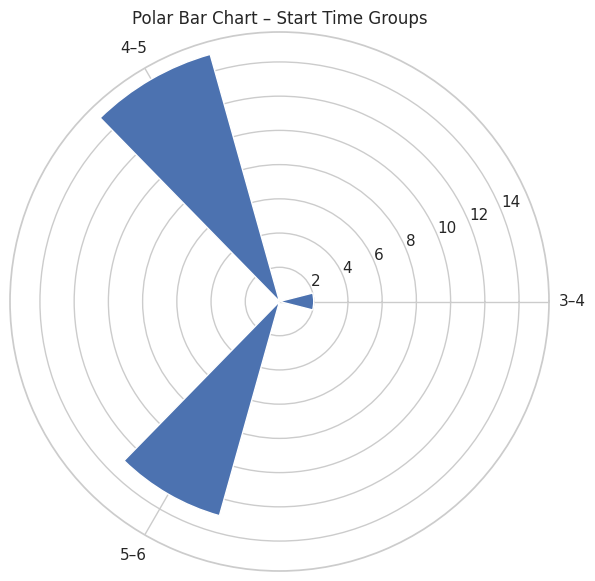

In [37]:
import numpy as np

values = start_group_counts.values
labels = start_group_counts.index
angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.bar(angles, values, width=0.5)
ax.set_xticks(angles)
ax.set_xticklabels(labels)
plt.title("Polar Bar Chart – Start Time Groups")
plt.show()


In [40]:
from pywaffle import Waffle

data_dict = start_group_counts.to_dict()

from pywaffle import Waffle

data_dict = start_group_counts.to_dict()

fig = Waffle(
    values=data_dict,
    rows=7,
    figsize=(10,6),
    colors=["#4C72B0","#55A868","#C44E52","#8172B3","#CCB974","#64B5CD"],  # bạn có thể chỉnh màu
    title={'label': 'Waffle Chart – Start Time Groups', 'loc': 'center'},
    labels=[f"{k} ({v})" for k,v in data_dict.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 3, 'fontsize':12}
)

plt.show()


ValueError: Length of colors doesn't match the values.

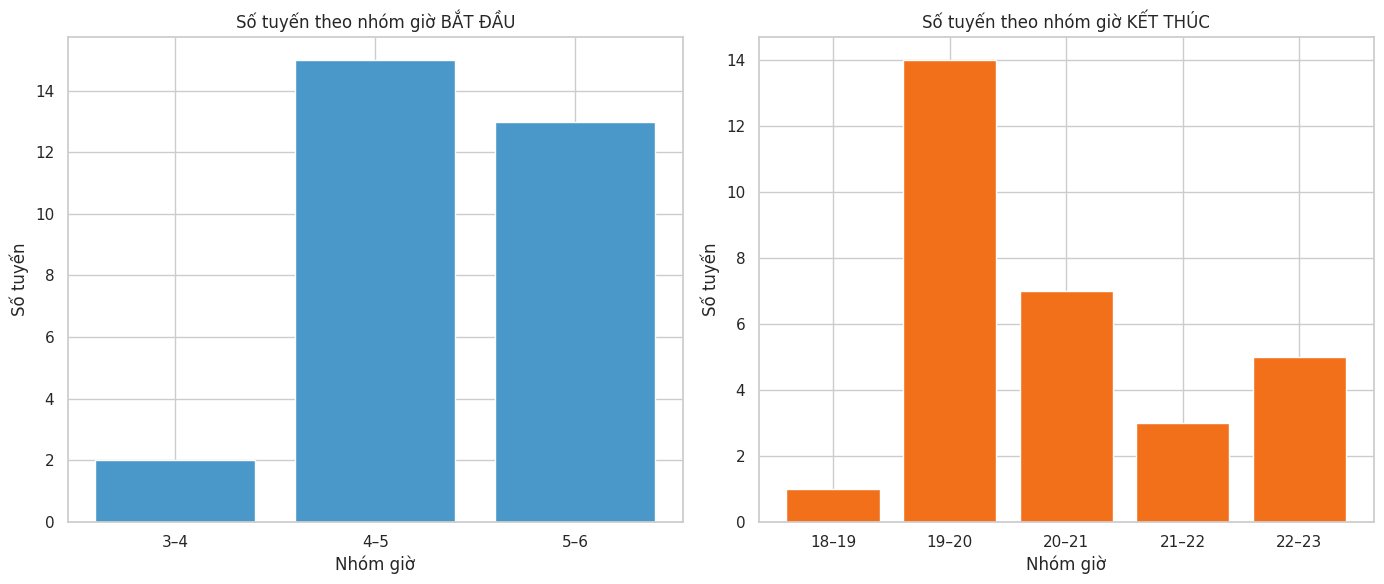

In [39]:
plt.figure(figsize=(14,6))

# Biểu đồ giờ BẮT ĐẦU
plt.subplot(1,2,1)
plt.bar(start_group_counts.index, start_group_counts.values, color=plt.cm.Blues(0.6))
plt.title("Số tuyến theo nhóm giờ BẮT ĐẦU")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")

# Biểu đồ giờ KẾT THÚC
plt.subplot(1,2,2)
plt.bar(end_group_counts.index, end_group_counts.values, color=plt.cm.Oranges(0.6))
plt.title("Số tuyến theo nhóm giờ KẾT THÚC")
plt.xlabel("Nhóm giờ")
plt.ylabel("Số tuyến")

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import folium

# Đường dẫn
route_dir = '/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/1'

# Đọc CSV
stops_df = pd.read_csv(f"{route_dir}/stops_by_var.csv")[['StopId','Name','Lat','Lng']]
rev_stops_df = pd.read_csv(f"{route_dir}/rev_stops_by_var.csv")[['StopId','Name','Lat','Lng']]

# Xác định stop trùng và không trùng
stops_set = set(stops_df['StopId'])
rev_stops_set = set(rev_stops_df['StopId'])

common_stops = stops_set & rev_stops_set
unique_stops = (stops_set | rev_stops_set) - common_stops

# Tính trung tâm để khởi tạo bản đồ
center_lat = (stops_df['Lat'].mean() + rev_stops_df['Lat'].mean())/2
center_lng = (stops_df['Lng'].mean() + rev_stops_df['Lng'].mean())/2

# Tạo bản đồ OSM
m = folium.Map(location=[center_lat, center_lng], zoom_start=12, tiles='OpenStreetMap')

# Vẽ marker tuyến đi
for idx, row in stops_df.iterrows():
    color = 'green' if row['StopId'] in common_stops else 'red'
    folium.CircleMarker(
        location=[row['Lat'], row['Lng']],
        radius=1,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=row['Name']
    ).add_to(m)

# Vẽ tuyến đi
coords = list(zip(stops_df['Lat'], stops_df['Lng']))
folium.PolyLine(coords, color='black', weight=3, opacity=0.6, tooltip="Tuyến đi").add_to(m)

# Vẽ tuyến về
rev_coords = list(zip(rev_stops_df['Lat'], rev_stops_df['Lng']))
folium.PolyLine(rev_coords, color='red', weight=3, opacity=0.6, tooltip="Tuyến về").add_to(m)

# Auto zoom theo bounding box
sw = [min(stops_df['Lat'].min(), rev_stops_df['Lat'].min()), min(stops_df['Lng'].min(), rev_stops_df['Lng'].min())]
ne = [max(stops_df['Lat'].max(), rev_stops_df['Lat'].max()), max(stops_df['Lng'].max(), rev_stops_df['Lng'].max())]
m.fit_bounds([sw, ne])

# Hiển thị bản đồ



In [53]:
import os
import pandas as pd
import numpy as np

root_dir = '/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/'

# Danh sách các tuyến
routes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

delta_distances = []

for route in routes:
    file_path = os.path.join(root_dir, route, 'vars_by_route.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'Distance' in df.columns and len(df) >= 2:
            # Lấy delta tuyệt đối
            delta = abs(df.loc[0, 'Distance'] - df.loc[1, 'Distance'])
            delta_distances.append(delta)

delta_distances = np.array(delta_distances)

# % tuyến có delta > 1000 m
num_total = len(delta_distances)
num_large = np.sum(delta_distances > 500)
pct_large = num_large / num_total * 100

print(f"Tổng số tuyến: {num_total}")
print(f"Số tuyến có delta distance > 1000 m: {num_large}")
print(f"Tỷ lệ: {pct_large:.2f}%")


Tổng số tuyến: 30
Số tuyến có delta distance > 1000 m: 17
Tỷ lệ: 56.67%


In [58]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
import time
import multiprocessing as mp
import os
import random

# -------------------------------
# Load stops_df
# -------------------------------
root_dir = '/content/drive/MyDrive/1_Work/BDC_Hack/HCMC_bus_routes/'
routes = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
all_stops = []

for route in routes:
    for fname in ['stops_by_var.csv', 'rev_stops_by_var.csv']:
        file_path = os.path.join(root_dir, route, fname)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df[['Lat','Lng','StopType']]
            df = df[df['StopType'] != 'Bến xe']
            all_stops.append(df)

stops_df = pd.concat(all_stops, ignore_index=True)

# File lưu kết quả tạm thời
output_file = "Shelters_Building_Dataset_LatLng.csv"
if os.path.exists(output_file):
    existing_df = pd.read_csv(output_file)
else:
    existing_df = pd.DataFrame(columns=['Lat','Lng','StopType','Max','Min','Gió','Lượng Mưa','Độ Ẩm','UV'])

# -------------------------------
# API keys
# -------------------------------
api_keys = [
    "d7c132a2d2e64644ac171729252211",
    "71a2c95976054c1e86285911252211",
    "2e540b25c8d04905a7090012252211",
    "b12bfb90f94548feb9490159252211",
    "75cbf0f6cf1b4757a2b90307252211"
]

# -------------------------------
# Hàm lấy weather
# -------------------------------
def get_weather_for_stop(args):
    idx, row, key, existing_data = args
    lat, lng, stop_type = row['Lat'], row['Lng'], row['StopType']

    # Nếu đã có dữ liệu
    if ((existing_data['Lat']==lat) & (existing_data['Lng']==lng)).any():
        return None

    url_template = "http://api.weatherapi.com/v1/history.json?key={key}&q={lat},{lng}&dt={date}"
    values = {'max':[], 'min':[], 'wind':[], 'precip':[], 'humidity':[], 'uv':[]}
    today = datetime.now()
    days = [today - timedelta(days=1), today - timedelta(days=2)]

    for day in days:
        try:
            url = url_template.format(key=key, lat=lat, lng=lng, date=day.strftime("%Y-%m-%d"))
            r = requests.get(url, timeout=10)
            if r.status_code == 200:
                data = r.json()
                day_data = data['forecast']['forecastday'][0]['day']
                values['max'].append(day_data['maxtemp_c'])
                values['min'].append(day_data['mintemp_c'])
                values['wind'].append(day_data['maxwind_kph'])
                values['precip'].append(day_data['totalprecip_mm'])
                values['humidity'].append(day_data['avghumidity'])
                values['uv'].append(day_data['uv'])
                print(f"Success: idx={idx}, lat={lat}, lng={lng}, key={key}")
                time.sleep(0.2)
            else:
                raise Exception(f"Status code {r.status_code}")
        except Exception as e:
            print(f"Error idx={idx}, lat={lat}, key={key}, error={e}")
            # Chọn random từ các stop trước cùng StopType nếu có
            subset = existing_data[existing_data['StopType']==stop_type]
            if len(subset)>0:
                sample = subset.sample(1)
                values['max'].append(sample['Max'].values[0])
                values['min'].append(sample['Min'].values[0])
                values['wind'].append(sample['Gió'].values[0])
                values['precip'].append(sample['Lượng Mưa'].values[0])
                values['humidity'].append(sample['Độ Ẩm'].values[0])
                values['uv'].append(sample['UV'].values[0])
            else:
                # Nếu không có dữ liệu trước, gán giá trị mặc định
                values['max'].append(35)
                values['min'].append(25)
                values['wind'].append(15)
                values['precip'].append(0)
                values['humidity'].append(75)
                values['uv'].append(8)

    avg_values = {k: np.mean(v) for k,v in values.items()}
    avg_values.update({'Lat':lat,'Lng':lng,'StopType':stop_type})
    return avg_values

# -------------------------------
# Tạo args cho multiprocessing
# -------------------------------
args_list = []
for idx, row in stops_df.iterrows():
    key = api_keys[idx % len(api_keys)]  # mỗi worker 1 key
    args_list.append((idx, row, key, existing_df))

# -------------------------------
# Multiprocessing
# -------------------------------
pool = mp.Pool(processes=len(api_keys))
results = pool.map(get_weather_for_stop, args_list)
pool.close()
pool.join()

# Lọc kết quả None (trùng dữ liệu cũ)
results = [r for r in results if r is not None]

# Gộp vào dataframe
if results:
    weather_df = pd.DataFrame(results)
    weather_df.rename(columns={'max':'Max','min':'Min','wind':'Gió','precip':'Lượng Mưa','humidity':'Độ Ẩm','uv':'UV'}, inplace=True)
    final_df = pd.concat([existing_df, weather_df], ignore_index=True)
else:
    final_df = existing_df.copy()

# Thêm TrainType
final_df['TrainType'] = final_df['StopType'].apply(lambda x: 'Train' if x=='Nhà chờ' else 'Test')

# Lưu CSV liên tục
final_df.to_csv(output_file, index=False)
print(f"Dataset đã lưu: {output_file}, tổng samples: {len(final_df)}")


Success: idx=971, lat=10.806144, lng=106.636055, key=71a2c95976054c1e86285911252211
Success: idx=705, lat=10.850772, lng=106.795515, key=d7c132a2d2e64644ac171729252211
Success: idx=1105, lat=10.798709, lng=106.637576, key=d7c132a2d2e64644ac171729252211
Success: idx=848, lat=10.741198, lng=106.700946, key=b12bfb90f94548feb9490159252211
Success: idx=1239, lat=10.788317, lng=106.623725, key=75cbf0f6cf1b4757a2b90307252211
Success: idx=971, lat=10.806144, lng=106.636055, key=71a2c95976054c1e86285911252211
Success: idx=706, lat=10.8533, lng=106.790886, key=71a2c95976054c1e86285911252211
Success: idx=1105, lat=10.798709, lng=106.637576, key=d7c132a2d2e64644ac171729252211
Success: idx=849, lat=10.734573, lng=106.699852, key=75cbf0f6cf1b4757a2b90307252211
Success: idx=1240, lat=10.790178, lng=106.621381, key=d7c132a2d2e64644ac171729252211
Success: idx=706, lat=10.8533, lng=106.790886, key=71a2c95976054c1e86285911252211Success: idx=972, lat=10.803541, lng=106.637887, key=2e540b25c8d04905a7090012

/tmp/ipython-input-2910190842.py:127: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([existing_df, weather_df], ignore_index=True)


In [59]:
!pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Đọc lại dataset nếu cần
df = pd.read_csv("Shelters_Building_Dataset.csv")

# Features (không dùng Lat/Lng)
feature_cols = ['Max','Min','Gió','Lượng Mưa','Độ Ẩm','UV']

# Tách train/test
train_df = df[df['TrainType']=='Train']
test_df = df[df['TrainType']=='Test']

X_train = train_df[feature_cols]
y_train = train_df['TrainType']

X_test = test_df[feature_cols]
y_test = test_df['TrainType']

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Dự đoán
y_pred = rf.predict(X_test)

# % stop test nên upgrade thành Nhà chờ
num_upgrade = np.sum(y_pred=='Train')
pct_upgrade = num_upgrade / len(y_pred) * 100

print(f"Tổng số stop test: {len(y_pred)}")
print(f"Số stop nên nâng cấp thành Nhà chờ: {num_upgrade}")
print(f"Tỷ lệ: {pct_upgrade:.2f}%")

Tổng số stop test: 2154
Số stop nên nâng cấp thành Nhà chờ: 2154
Tỷ lệ: 100.00%
